In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset
df = pd.read_csv("C:\\Users\\Rishu Jaiswal\\Downloads\\archive (2)\\Data\\features_30_sec.csv")

In [3]:
df.shape

(1000, 60)

In [4]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
df.tail()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock
999,rock.00099.wav,661794,0.358401,0.085884,0.054454,0.000336,1609.795082,422203.216152,1797.213044,120115.632927,...,59.167755,-7.069775,73.760391,0.028346,76.504326,-2.025783,72.189316,1.155239,49.662510,rock


In [6]:
np.unique(df['label'])

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [7]:
blues_class_df = df[df['label']=='blues']
blues_class_df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blues.00095.wav,661794,0.369944,0.091291,0.187093,0.002157,1388.635157,509489.418203,1773.023640,164770.603592,...,59.609543,-4.846665,76.014030,-5.967407,66.805000,-2.789360,51.622269,-6.488822,67.523346,blues
96,blues.00096.wav,661794,0.260525,0.091813,0.051400,0.000858,1132.135958,319127.465671,1582.635546,151263.927431,...,169.111008,-5.682142,149.492767,1.569424,165.521057,0.889100,176.933533,-7.959035,138.088654,blues
97,blues.00097.wav,661794,0.375062,0.093856,0.198329,0.002949,1236.230772,422824.333777,1601.921981,295866.241434,...,95.229355,-15.740178,69.669884,-5.620852,102.523972,-5.787607,54.506149,-0.037583,55.425610,blues
98,blues.00098.wav,661794,0.442966,0.078316,0.125455,0.001709,2310.498240,191255.537131,2206.581011,62348.600432,...,44.744358,-11.147454,36.118103,1.159217,45.358360,-3.912875,60.196030,3.235770,44.576633,blues


In [8]:
#dataframe for classical class
classical_class_df = df[df['label']=='classical']

In [9]:
new_data = pd.concat([blues_class_df, classical_class_df], axis=0)
new_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [10]:
new_data.tail()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
195,classical.00095.wav,661794,0.227693,0.088256,0.013564,0.000229,1800.888692,285133.982200,1781.068502,62925.517209,...,136.467468,2.417449,125.991013,0.779610,68.256584,-3.415084,162.598373,-0.739651,160.096695,classical
196,classical.00096.wav,661794,0.293052,0.082874,0.056987,0.000786,1933.689602,192223.362906,1740.491088,27385.874713,...,49.117809,2.988827,39.963310,3.548611,52.965549,-3.346735,87.178192,-3.686793,108.163559,classical
197,classical.00097.wav,661794,0.222265,0.083254,0.036720,0.000465,1494.419821,92293.654720,1671.195986,31772.320797,...,97.051605,0.787177,74.531082,-3.961360,52.424522,-9.148158,118.060760,-6.935011,104.361465,classical
198,classical.00098.wav,661794,0.289919,0.088790,0.029094,0.000332,1952.495511,166304.035830,1865.737617,22529.553814,...,59.865459,7.026492,83.698685,8.378774,71.380379,-5.610244,61.358536,1.379220,123.965485,classical
199,classical.00099.wav,661794,0.333908,0.078685,0.010506,0.000004,1525.123851,46679.590001,1869.056261,21425.264913,...,89.436073,2.519061,91.123299,4.399822,57.132504,1.703097,74.828583,9.978046,108.066185,classical


In [11]:
# Features (X) and target variable (y)
X = new_data[['chroma_stft_mean','rms_mean']]
y = new_data['label']

In [12]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
# Creating a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Training the kNN classifier
neigh.fit(X_train, y_train)

# Test the accuracy of the kNN using the test set
accuracy = neigh.score(X_test, y_test)

print("Accuracy of the kNN classifier:", accuracy)

Accuracy of the kNN classifier: 0.95


In [14]:
 # Predicting the classes of test vectors
predictions = neigh.predict(X_test)

# Displaying the predictions
print("Predictions for test vectors:")
print(predictions)

Predictions for test vectors:
['blues' 'blues' 'blues' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'blues' 'classical' 'classical' 'blues'
 'classical' 'classical' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'classical' 'classical' 'classical' 'classical' 'blues' 'classical'
 'classical' 'blues' 'classical' 'blues' 'blues' 'classical' 'blues'
 'classical' 'classical' 'classical' 'blues' 'blues' 'blues' 'blues'
 'classical' 'classical' 'classical' 'classical' 'blues' 'classical'
 'classical' 'classical' 'classical' 'classical' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'classical' 'blues' 'classical']


In [15]:
# Train and test kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
print(accuracy_knn)

# Train and test NN classifier with k=1
nn_classifier = KNeighborsClassifier(n_neighbors=1)
nn_classifier.fit(X_train, y_train)
nn_pred = nn_classifier.predict(X_test)
accuracy_nn = accuracy_score(y_test, nn_pred)
print(accuracy_nn)

0.95
0.9333333333333333


In [16]:
# Accuracy lists to store accuracies for different values of k
accuracies = []

In [17]:
# Vary k from 1 to 11
for k in range(1, 12):
    # Train kNN classifier with current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    
    # Test the classifier
    knn_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, knn_pred) 
    
    # Append accuracy to the list
    accuracies.append(accuracy)       


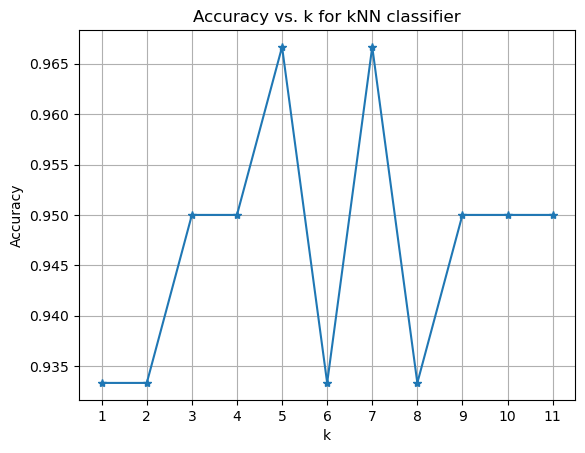

In [18]:
# Plotting accuracy versus k
plt.plot(range(1, 12), accuracies, marker='*')
plt.title('Accuracy vs. k for kNN classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# Initialize kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict labels for training and test data
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# Evaluate performance metrics
# Confusion matrix and classification report for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

# Confusion matrix and classification report for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

# Print the confusion matrix and classification report for both training and test data
print("Confusion Matrix - Training Data:")
print(conf_matrix_train)
print("\nClassification Report - Training Data:")
print(classification_rep_train)

print("\nConfusion Matrix - Test Data:")
print(conf_matrix_test)
print("\nClassification Report - Test Data:")
print(classification_rep_test)

Confusion Matrix - Training Data:
[[68  3]
 [10 59]]

Classification Report - Training Data:
              precision    recall  f1-score   support

       blues       0.87      0.96      0.91        71
   classical       0.95      0.86      0.90        69

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140


Confusion Matrix - Test Data:
[[27  2]
 [ 1 30]]

Classification Report - Test Data:
              precision    recall  f1-score   support

       blues       0.96      0.93      0.95        29
   classical       0.94      0.97      0.95        31

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

